In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd

liestal_bloom_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/data/liestal.csv")

In [32]:
liestal_bloom_data.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,liestal,47.4814,7.730519,350,1894,1894-04-16,106
1,liestal,47.4814,7.730519,350,1895,1895-04-17,107
2,liestal,47.4814,7.730519,350,1896,1896-04-16,107
3,liestal,47.4814,7.730519,350,1897,1897-03-27,86
4,liestal,47.4814,7.730519,350,1898,1898-04-16,106


In [33]:
liestal_weather_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/swiss_data_temps.csv")

In [34]:
liestal_weather_df = liestal_weather_data.iloc[:, 5:]

In [35]:
liestal_weather_df.head()

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,2/1/1976,0.0,0.8,NaN,31.0,14.0
1,2/2/1976,0.0,0.8,NaN,29.0,17.0
2,2/3/1976,0.0,0.8,NaN,38.0,22.0
3,2/4/1976,0.0,0.4,NaN,36.0,29.0
4,2/5/1976,0.0,0.0,NaN,36.0,30.0


In [36]:
#Switzerland 
#Summer June to September
#Winter November to March
#Spring March to June
#Autumn September to November

def find_season(date):
  season_month = {
      '12':'Winter-EOY', '01':'Winter-BOY', '02':'Winter-BOY',  # end-of-year winter and beginning-of-year winter
      '03':'Spring', '04':'Spring', '05':'Spring',
      '06':'Summer', '07':'Summer', '08':'Summer',
      '09':'Autumn', '10':'Autumn', '11':'Winter-EOY'}
  return season_month.get(date.partition('/')[0])

# applys season function
liestal_weather_df["season"] = liestal_weather_df["DATE"].astype(str).apply(find_season)

# extracts year from date
liestal_weather_df["year"] = liestal_weather_df["DATE"].astype(str).apply(lambda date: date[-4:])

# drops date column
liestal_weather_df = liestal_weather_df.drop(["DATE"], axis=1)

In [37]:
# formats to better datatypes
liestal_weather_df["TAVG"] = liestal_weather_df["TAVG"].astype(float)
liestal_weather_df["TMAX"] = liestal_weather_df["TMAX"].astype(float)
liestal_weather_df["TMIN"] = liestal_weather_df["TMIN"].astype(float)
liestal_weather_df["PRCP"] = liestal_weather_df["PRCP"].astype(float)
liestal_weather_df["SNWD"] = liestal_weather_df["SNWD"].astype(float)
liestal_weather_df["year"] = liestal_weather_df["year"].astype(int)

In [38]:
liestal_weather_df

,PRCP,SNWD,TAVG,TMAX,TMIN,season,year
0,0.00,0.8,NaN,31.0,14.0,None,1976
1,0.00,0.8,NaN,29.0,17.0,None,1976
2,0.00,0.8,NaN,38.0,22.0,None,1976
3,0.00,0.4,NaN,36.0,29.0,None,1976
4,0.00,0.0,NaN,36.0,30.0,None,1976
...,...,...,...,...,...,...,...
146524,0.01,NaN,48.0,52.0,38.0,None,2022
146525,0.16,NaN,44.0,NaN,38.0,None,2022
146526,0.12,NaN,46.0,51.0,41.0,None,2022
146527,0.00,NaN,48.0,55.0,NaN,None,2022


In [39]:
# adds data of previous december to current year's winter
liestal_weather_df["year"] = liestal_weather_df[["season","year"]].apply(lambda x: x["year"] + 1 if x["season"] == "Winter-EOY" else x["year"], axis=1)

# standardizes all winters
liestal_weather_df["season"] = liestal_weather_df["season"].replace(to_replace=["Winter-EOY", "Winter-BOY"], value="Winter")

liestal_weather_df.head(200)

,PRCP,SNWD,TAVG,TMAX,TMIN,season,year
0,0.00,0.8,NaN,31.0,14.0,None,1976
1,0.00,0.8,NaN,29.0,17.0,None,1976
2,0.00,0.8,NaN,38.0,22.0,None,1976
3,0.00,0.4,NaN,36.0,29.0,None,1976
4,0.00,0.0,NaN,36.0,30.0,None,1976
...,...,...,...,...,...,...,...
195,0.00,0.0,NaN,80.0,53.0,None,1976
196,0.49,0.0,NaN,76.0,51.0,None,1976
197,0.02,0.0,NaN,67.0,59.0,None,1976
198,0.00,0.0,NaN,74.0,55.0,None,1976


In [40]:
liestal_weather_df.tail(200)

,PRCP,SNWD,TAVG,TMAX,TMIN,season,year
146329,0.00,0.0,63.0,73.0,53.0,None,2021
146330,0.00,0.0,68.0,81.0,56.0,None,2021
146331,0.00,0.0,70.0,84.0,61.0,None,2021
146332,0.00,0.0,75.0,88.0,62.0,None,2021
146333,0.00,0.0,76.0,85.0,65.0,None,2021
...,...,...,...,...,...,...,...
146524,0.01,NaN,48.0,52.0,38.0,None,2022
146525,0.16,NaN,44.0,NaN,38.0,None,2022
146526,0.12,NaN,46.0,51.0,41.0,None,2022
146527,0.00,NaN,48.0,55.0,NaN,None,2022


In [41]:
# groups based on year and season
liestal_weather_df_grouped = liestal_weather_df.groupby(["year", "season"]).agg({'TAVG':'mean',
                                                                 'TMAX':'max',
                                                                 'TMIN':'min',
                                                                 'PRCP':['sum','mean','median'],
                                                                 'SNWD':['sum','mean','median']}).reset_index()

liestal_weather_df_grouped.head()

year  season TAVG  TMAX  TMIN  PRCP                  SNWD            
                mean   max   min   sum      mean median  sum mean median
0  1901  Autumn  NaN  69.0  33.0  2.14  0.069032   0.00  0.0  NaN    NaN
1  1902  Autumn  NaN  63.0  33.0  3.37  0.108710   0.04  0.0  NaN    NaN
2  1902  Winter  NaN  58.0  23.0  3.59  0.058852   0.00  0.0  NaN    NaN
3  1903  Autumn  NaN  75.0  32.0  2.92  0.094194   0.02  0.0  NaN    NaN
4  1903  Winter  NaN  55.0  10.0  4.34  0.071148   0.00  0.0  NaN    NaN

In [42]:
# applys season function
liestal_bloom_df = liestal_bloom_data.copy()
liestal_bloom_df["season"] = liestal_bloom_df["bloom_date"].astype(str).apply(find_season)

# drops bloom_date column and constant data
liestal_bloom_df = liestal_bloom_df.drop(["bloom_date","location", "lat", "long", "alt","season"], axis=1)

In [43]:
liestal_bloom_df.tail(15)

,year,bloom_doy
113,2007,94
114,2008,89
115,2009,100
116,2010,98
117,2011,90
118,2012,93
119,2013,107
120,2014,84
121,2015,101
122,2016,97


In [44]:
# adds climate data to bloom date
liestal_merged_df = pd.merge(liestal_bloom_df, liestal_weather_df_grouped, on="year", how="outer")

# sets year as index
liestal_merged_df = liestal_merged_df.set_index(liestal_merged_df.columns[0])

# fixes column names
liestal_merged_df.columns = ['bloom_day', 'season', 'TAVG_mean', 'TMAX_max', 'TMIN_min', 'PRCP_sum', 'PRCP_mean', 'PRCP_median', 'SNOW_sum', 'SNOW_mean', 'SNOW_median']

# removes rows that lack seasonal data
liestal_merged_df = liestal_merged_df[liestal_merged_df['season'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [45]:
liestal_merged_df

,bloom_day,season,TAVG_mean,TMAX_max,TMIN_min,PRCP_sum,PRCP_mean,PRCP_median,SNOW_sum,SNOW_mean,SNOW_median
year,,,,,,,,,,,
1901,113.0,Autumn,NaN,69.0,33.0,2.14,0.069032,0.000,0.0,NaN,NaN
1902,102.0,Autumn,NaN,63.0,33.0,3.37,0.108710,0.040,0.0,NaN,NaN
1902,102.0,Winter,NaN,58.0,23.0,3.59,0.058852,0.000,0.0,NaN,NaN
1903,86.0,Autumn,NaN,75.0,32.0,2.92,0.094194,0.020,0.0,NaN,NaN
1903,86.0,Winter,NaN,55.0,10.0,4.34,0.071148,0.000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020,77.0,Autumn,51.209677,68.0,35.0,21.00,0.135484,0.060,0.0,0.000000,0.0
2020,77.0,Winter,41.967213,65.0,23.0,27.44,0.089967,0.010,0.4,0.002186,0.0
2021,87.0,Autumn,50.661290,77.0,29.0,7.00,0.056911,0.000,0.0,0.000000,0.0


In [46]:
import numpy as np

# creates dataframe with seasonal variables as columns
seasons = ("Summer", "Winter", "Autumn", "Spring")

new_columns = []
for season in seasons:
  for column in liestal_merged_df.columns[2:]:
    new_columns.append(f"{season}_{column}")

liestal_processed_df = pd.DataFrame(columns=new_columns)

for year, row in liestal_merged_df.iterrows():
  included_cols = []
  new_row = []

  for season in seasons:
    if row["season"] == season:
      for column in liestal_merged_df.columns[2:]:
        included_cols.append(f"{season}_{column}")
        new_row.append(row[column])
  
  row_df = pd.DataFrame([pd.Series(new_row)], index = [year])
  row_df = row_df.set_axis(included_cols, axis=1, inplace=False)
  
  liestal_processed_df = pd.concat([row_df, liestal_processed_df])[liestal_processed_df.columns]  # preserves column name order

# combines rows
liestal_processed_df = liestal_processed_df.groupby(liestal_processed_df.index)[liestal_processed_df.columns].first()

# adds bloom doys
liestal_processed_df.insert(0, "bloom_doy", np.NaN)

for year, row in liestal_processed_df.iterrows():
  try:
    liestal_processed_df.loc[year, "bloom_doy"] = int(liestal_bloom_df.query(f"year=={str(year)}")["bloom_doy"])
  except:
    liestal_processed_df.loc[year, "bloom_doy"] = np.NaN

liestal_processed_df = liestal_processed_df[:-1]

In [47]:
int(liestal_bloom_df.query(f"year=={str(2021)}")["bloom_doy"])

87

In [48]:
liestal_processed_df.tail()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Summer_PRCP_mean,Summer_PRCP_median,Summer_SNOW_sum,Summer_SNOW_mean,Summer_SNOW_median,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_PRCP_mean,Winter_PRCP_median,Winter_SNOW_sum,Winter_SNOW_mean,Winter_SNOW_median,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_PRCP_mean,Autumn_PRCP_median,Autumn_SNOW_sum,Autumn_SNOW_mean,Autumn_SNOW_median,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_PRCP_mean,Spring_PRCP_median,Spring_SNOW_sum,Spring_SNOW_mean,Spring_SNOW_median
2017,85.0,None,None,None,None,None,None,None,None,None,37.991803,66.0,18.0,13.58,0.044525,0.00,0.0,0.000000,0.0,53.645161,80.0,26.0,9.03,0.058258,0.00,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None
2018,98.0,None,None,None,None,None,None,None,None,None,39.950820,66.0,22.0,42.07,0.137934,0.02,28.0,0.148148,0.0,53.000000,80.0,27.0,7.96,0.051688,0.00,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None
2019,86.0,None,None,None,None,None,None,None,None,None,42.131148,64.0,22.0,26.71,0.087862,0.01,2.8,0.015301,0.0,54.580645,79.0,38.0,23.47,0.151419,0.08,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None
2020,77.0,None,None,None,None,None,None,None,None,None,41.967213,65.0,23.0,27.44,0.089967,0.01,0.4,0.002186,0.0,51.209677,68.0,35.0,21.00,0.135484,0.06,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None
2021,87.0,None,None,None,None,None,None,None,None,None,41.885246,73.0,24.0,19.32,0.063553,0.00,15.9,0.086413,0.0,50.661290,77.0,29.0,7.00,0.056911,0.00,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None


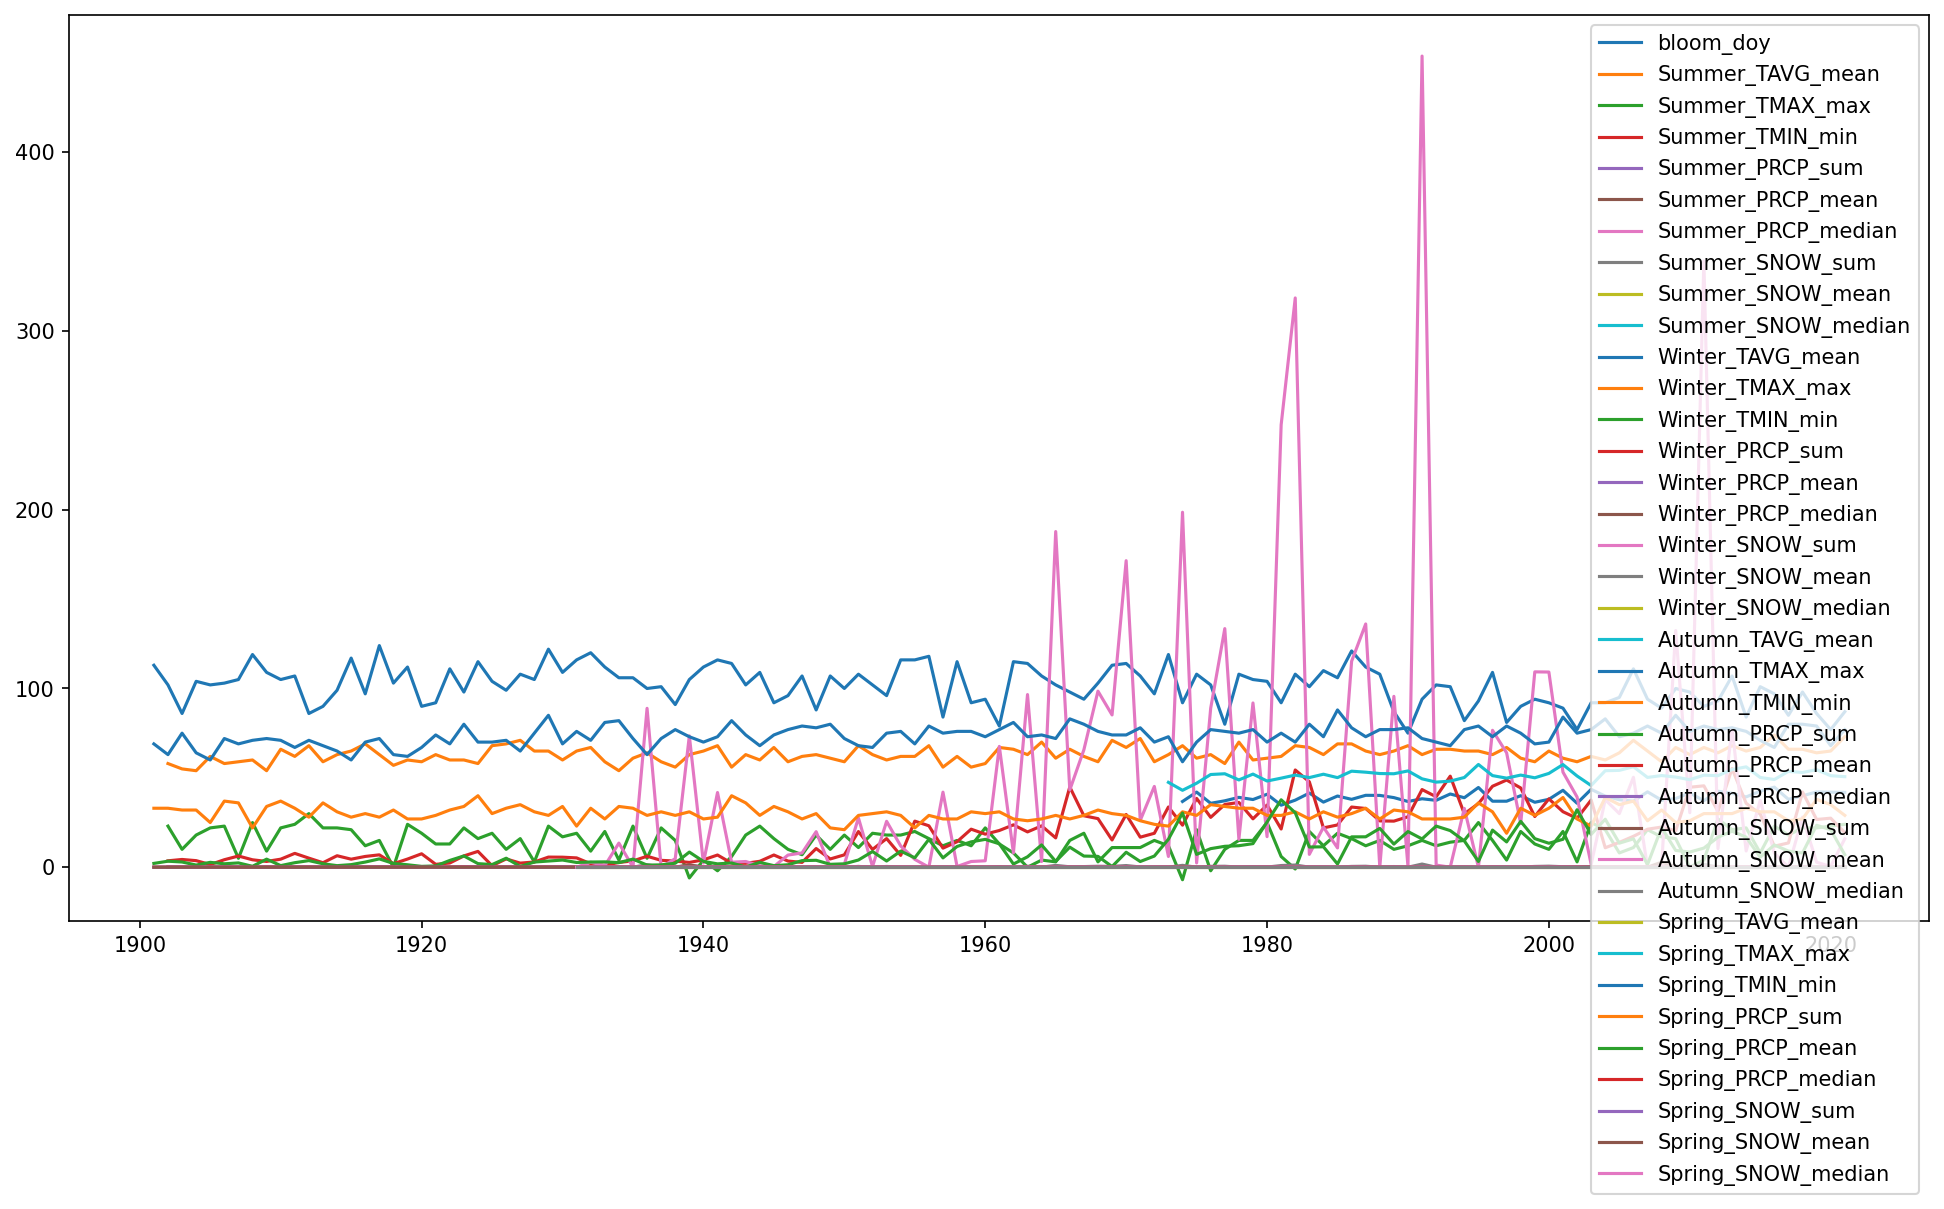

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(liestal_processed_df)
plt.gca().legend(tuple(liestal_processed_df.columns), loc='upper right')
plt.show()

In [50]:
liestal_processed_df.shape

(121, 37)

In [51]:
# removes low variance columns
from sklearn.feature_selection import VarianceThreshold

liestal_imputed_df = liestal_processed_df.copy()

var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(liestal_imputed_df)

concol = [column for column in liestal_imputed_df.columns 
          if column not in liestal_imputed_df.columns[var_thr.get_support()]]

liestal_imputed_df = liestal_imputed_df.drop(concol, axis=1)

print(concol)

['Summer_TAVG_mean', 'Summer_TMAX_max', 'Summer_TMIN_min', 'Summer_PRCP_sum', 'Summer_PRCP_mean', 'Summer_PRCP_median', 'Summer_SNOW_sum', 'Summer_SNOW_mean', 'Summer_SNOW_median', 'Winter_PRCP_mean', 'Winter_PRCP_median', 'Winter_SNOW_mean', 'Winter_SNOW_median', 'Autumn_PRCP_mean', 'Autumn_PRCP_median', 'Autumn_SNOW_sum', 'Autumn_SNOW_mean', 'Autumn_SNOW_median', 'Spring_TAVG_mean', 'Spring_TMAX_max', 'Spring_TMIN_min', 'Spring_PRCP_sum', 'Spring_PRCP_mean', 'Spring_PRCP_median', 'Spring_SNOW_sum', 'Spring_SNOW_mean', 'Spring_SNOW_median']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [52]:
from sklearn.impute import KNNImputer

# knn imputation
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
liestal_imputed_df = pd.DataFrame(knn_imputer.fit_transform(liestal_imputed_df), columns = liestal_imputed_df.columns)

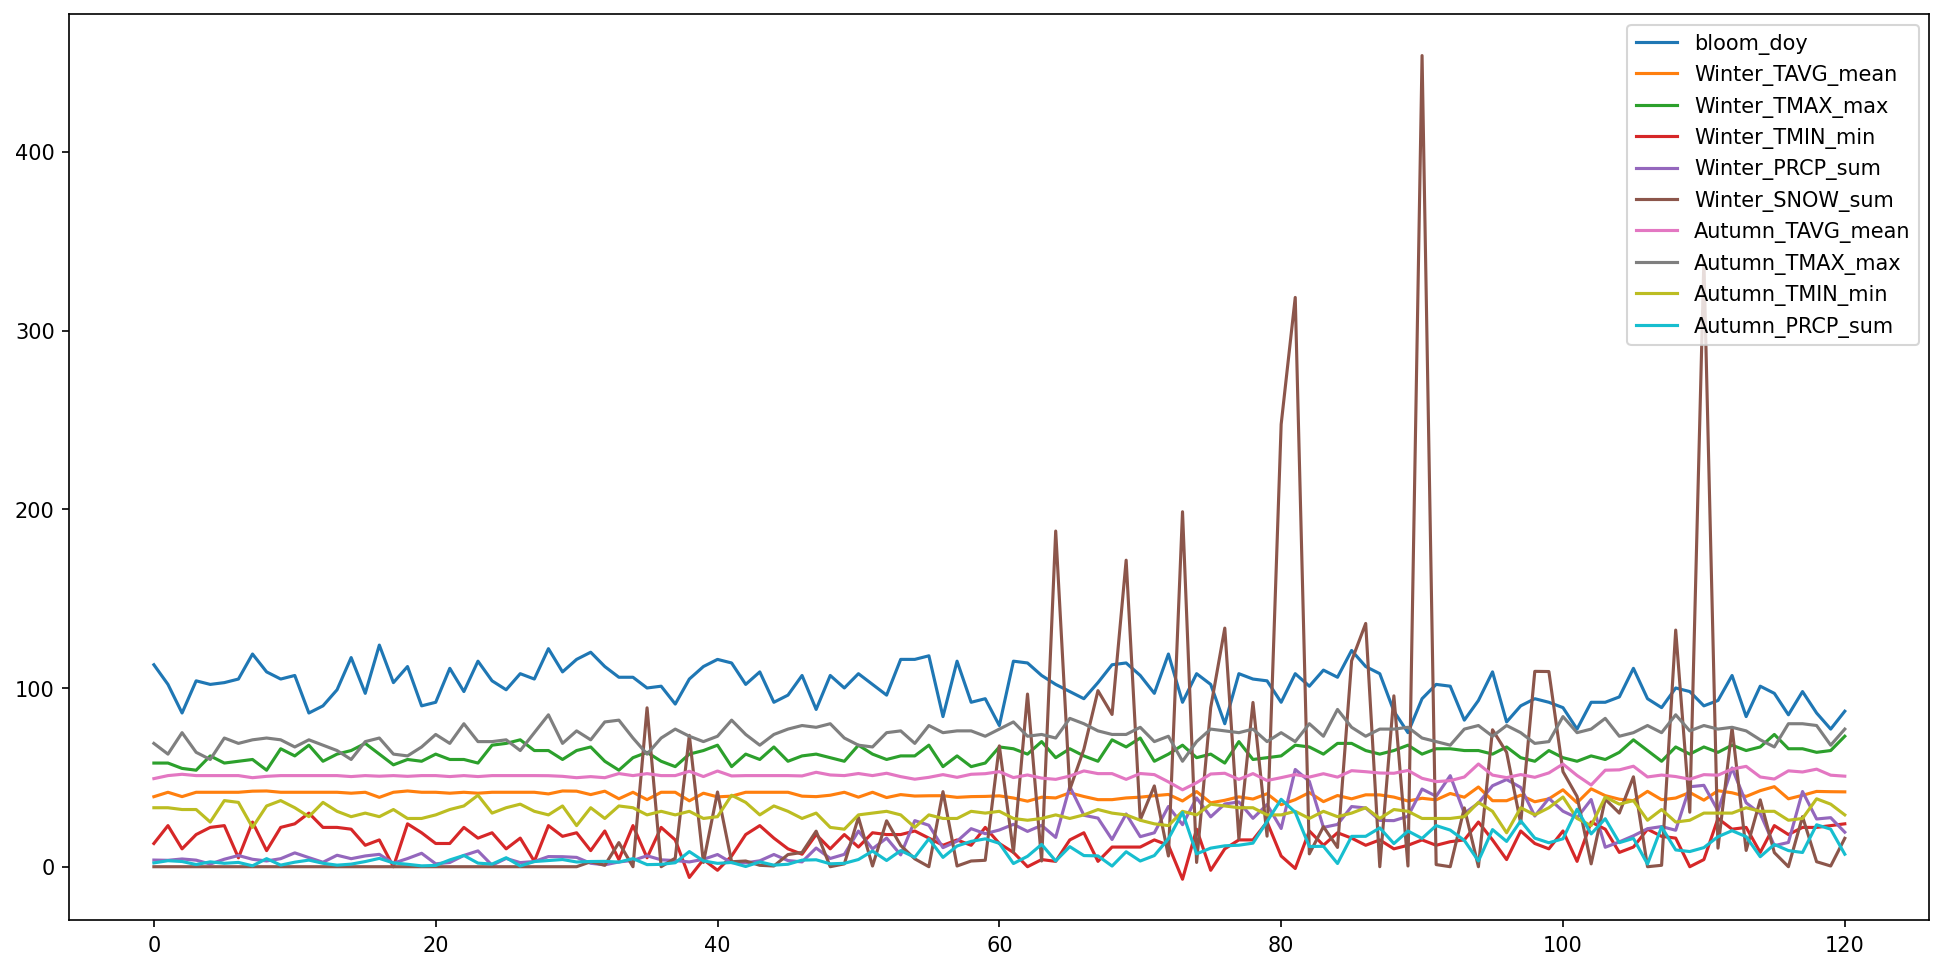

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(liestal_imputed_df)
plt.gca().legend(tuple(liestal_imputed_df.columns), loc='upper right')
plt.show()

In [54]:
liestal_imputed_df.head()

,bloom_doy,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_SNOW_sum,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum
0,113.0,39.180328,58.0,13.0,3.733333,0.0,49.290323,69.0,33.0,2.14
1,102.0,41.653005,58.0,23.0,3.590000,0.0,50.978495,63.0,33.0,3.37
2,86.0,39.221311,55.0,10.0,4.340000,0.0,51.720430,75.0,32.0,2.92
3,104.0,41.653005,54.0,18.0,3.680000,0.0,50.978495,64.0,32.0,1.22
4,102.0,41.653005,62.0,22.0,1.490000,0.0,50.978495,60.0,25.0,2.73


In [55]:
train = liestal_imputed_df[:int(0.8*(len(liestal_imputed_df)))]
valid = liestal_imputed_df[int(0.8*(len(liestal_imputed_df))):]

In [56]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [57]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[liestal_imputed_df.columns])

for j in range(0,len(liestal_imputed_df.columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in liestal_imputed_df.columns:
    print('MAE value for', i, 'is : ', sqrt(mean_absolute_error(pred[i], valid[i])))

MAE value for bloom_doy is :  3.186916962233666
MAE value for Winter_TAVG_mean is :  1.4753613082139623
MAE value for Winter_TMAX_max is :  1.8515942087289021
MAE value for Winter_TMIN_min is :  2.7447887164720517
MAE value for Winter_PRCP_sum is :  3.16825047660879
MAE value for Winter_SNOW_sum is :  7.206539066850158
MAE value for Autumn_TAVG_mean is :  1.4535456768492707
MAE value for Autumn_TMAX_max is :  2.0758722221253514
MAE value for Autumn_TMIN_min is :  2.0047457347896924
MAE value for Autumn_PRCP_sum is :  2.3887638757258216


In [58]:
# make final predictions
model = VAR(endog=liestal_imputed_df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=10)
print(yhat)

[[ 99.18283067  40.15992897  63.99303171  16.18060651  20.65346267
   39.19412494  52.27449758  75.90591479  31.42025676   8.53633561]
 [100.20419815  39.8819366   63.43902399  14.68223191  20.08320704
   37.5100046   51.62047775  74.32858733  30.46994156   9.68333198]
 [100.28432424  39.94234291  63.40359714  14.41112541  20.08428183
   41.40292836  51.29072438  73.98834839  30.15130982   9.69393941]
 [100.47436744  39.95222042  63.40551984  14.37023771  20.04383145
   40.94664096  51.20992602  73.93398425  30.13159135   9.72795353]
 [100.50560403  39.95138091  63.39737442  14.35058495  19.96315502
   41.18042711  51.19202201  73.91576162  30.13751469   9.7113028 ]
 [100.54001911  39.95581888  63.39321034  14.35177549  19.9096631
   41.05214119  51.18630212  73.90493734  30.13851953   9.68211659]
 [100.55985667  39.9583256   63.38878481  14.35172279  19.85666925
   40.94032098  51.18489066  73.89715517  30.14006847   9.6579824 ]
 [100.57648457  39.96089578  63.38482443  14.35217764  1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
